In [ ]:
import numpy as np
import math
import time
import random
import itertools
import queue
import pandas as pd
from IPython.display import display, Markdown

In [ ]:
# Dataset number. 1, 2 or 3
dataset = "2"

if dataset == "1":
    optimalObjective = 4534
elif dataset == "2":
    optimalObjective = 920
else:
    optimalObjective = 1302

filename = "data" + dataset + ".txt"
f = open(filename, 'r')
l = f.readline().split()

# number of jobs
n = int(l[0])

# number of machines
m = int(l[1])

# ith job's processing time at jth machine 
cost = []
    
for i in range(n):
    temp = []
    for j in range(m):
        temp.append(0)
    cost.append(temp)
    
for i in range(n):
    line = f.readline().split()
    for j in range(int(len(line)/2)):
        cost[i][j] = int(line[2*j+1])
    
f.close()

In [ ]:
def initialization(Npop):
    pop = []
    for i in range(Npop):
        p = list(np.random.permutation(n))
        while p in pop:
            p = list(np.random.permutation(n))
        pop.append(p)
    
    return pop

def calculateObj(sol):
    qTime = queue.PriorityQueue()
    
    qMachines = []
    for i in range(m):
        qMachines.append(queue.Queue())
    
    for i in range(n):
        qMachines[0].put(sol[i])
    
    busyMachines = []
    for i in range(m):
        busyMachines.append(False)
    
    time = 0
    
    job = qMachines[0].get()
    qTime.put((time+cost[job][0], 0, job))
    busyMachines[0] = True
    
    while True:
        time, mach, job = qTime.get()
        if job == sol[n-1] and mach == m-1:
            break
        busyMachines[mach] = False
        if not qMachines[mach].empty():
                j = qMachines[mach].get()
                qTime.put((time+cost[j][mach], mach, j))
                busyMachines[mach] = True
        if mach < m-1:
            if busyMachines[mach+1] == False:
                qTime.put((time+cost[job][mach+1], mach+1, job))
                busyMachines[mach+1] = True
            else:
                qMachines[mach+1].put(job)
            
    return time
        

def selection(pop):
    popObj = []
    for i in range(len(pop)):
        popObj.append([calculateObj(pop[i]), i])
    
    popObj.sort()
    
    distr = []
    distrInd = []
    
    for i in range(len(pop)):
        distrInd.append(popObj[i][1])
        prob = (2*(i+1)) / (len(pop) * (len(pop)+1))
        distr.append(prob)
    
    parents = []
    for i in range(len(pop)):
        parents.append(list(np.random.choice(distrInd, 2, p=distr)))
    
    return parents

def crossover(parents):
    pos = list(np.random.permutation(np.arange(n-1)+1)[:2])
    
    if pos[0] > pos[1]:
        t = pos[0]
        pos[0] = pos[1]
        pos[1] = t
    
    child = list(parents[0])
    
    for i in range(pos[0], pos[1]):
        child[i] = -1
    
    p = -1
    for i in range(pos[0], pos[1]):
        while True:
            p = p + 1
            if parents[1][p] not in child:
                child[i] = parents[1][p]
                break
    
    return child


def mutation(sol):
    pos = list(np.random.permutation(np.arange(n))[:2])
    
    if pos[0] > pos[1]:
        t = pos[0]
        pos[0] = pos[1]
        pos[1] = t
    
    remJob = sol[pos[1]]
    
    for i in range(pos[1], pos[0], -1):
        sol[i] = sol[i-1]
        
    sol[pos[0]] = remJob
    
    return sol
        
def elitistUpdate(oldPop, newPop):
    bestSolInd = 0
    bestSol = calculateObj(oldPop[0])
    
    for i in range(1, len(oldPop)):
        tempObj = calculateObj(oldPop[i])
        if tempObj < bestSol:
            bestSol = tempObj
            bestSolInd = i
            
    rndInd = random.randint(0,len(newPop)-1)
    
    newPop[rndInd] = oldPop[bestSolInd]
    
    return newPop

# Returns best solution's index number, best solution's objective value and average objective value of the given population.
def findBestSolution(pop):
    bestObj = calculateObj(pop[0])
    avgObj = bestObj
    bestInd = 0
    for i in range(1, len(pop)):
        tObj = calculateObj(pop[i])
        avgObj = avgObj + tObj
        if tObj < bestObj:
            bestObj = tObj
            bestInd = i
            
    return bestInd, bestObj, avgObj/len(pop)

In [ ]:
popSize1 = [3,3,3,3,3,5,5,5,5,5,10,10,10,10,10]
objVal1 = [4534,4534,4534,4534,4534,4534,4534,4534,4534,4534,4534,4534,4534,4534,4534]
avgObj1 = [4929.33,4840.33,5002.00,5154.33,4836.00,5066.80,5356.20,5663.20,4850.20,5050.60,5530.40,5839.50,5671.60,5725.70,5459.10]
gap1 =  [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00]
cpuTime1 = [24.80,25.36,26.22,26.35,25.44,43.37,43.84,43.72,44.11,43.64,86.21,86.90,82.90,80.21,68.50]

popSize2 = [3,3,3,3,3,5,5,5,5,5,10,10,10,10,10]
objVal2 = [920,929,920,920,937,931,937,937,926,920,937,931,929,938,937]
avgObj2 = [1001.00,1002.33,1055.00,964.67,1028.67,1052.40,1185.20,1074.00,1076.00,1063.60,1177.00,1166.00,1139.80,1182.50,1181.40]
gap2 =  [0.00,0.98,0.00,0.00,1.85,1.20,1.85,1.85,0.65,0.00,1.85,1.20,0.98,1.96,1.85]
cpuTime2 = [41.74,42.15, 45.23,40.75,39.75,64.36,64.04,64.76,67.21,66.68,123.27,122.97,122.32, 122.29,122.42]

popSize3 = [3,3,3,3,3,5,5,5,5,5,10,10,10,10,10]
objVal3 = [1302,1302,1302,1302,1302,1302,1302,1302,1302,1323,1302,1302,1302,1302,1323]
avgObj3 = [1363.00, 1390.00,1341.00,1302.00, 1346.33, 1521.20,1403.40,1398.40,1497.00,1453.00, 1610.50, 1619.90,1654.90,1600.30,1678.80]
gap3 =  [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.61,0.00,0.00,0.00,0.00,1.61]
cpuTime3 = [57.17, 57.09,56.90,57.42,56.91,94.06,93.96, 93.88,93.97,93.81,182.90,189.32,199.76,200.02,193.59]

#dSet = dSet1 + dSet2 + dSet3
popSize = popSize1 + popSize2 + popSize3
objVal = objVal1 + objVal2 + objVal3
avgObj = avgObj1 + avgObj2 + avgObj3
gap = gap1 + gap2 + gap3
cpuTime = cpuTime1 + cpuTime2 + cpuTime3


dfDict1 = {'Pop Size':popSize1, 'Obj Val':objVal1, 'Pop Avg Obj':avgObj1, '%Gap':gap1, 'CPU Time (s)':cpuTime1 }
ds1 = pd.DataFrame(dfDict1)
ds1 = ds1[['Pop Size', 'Obj Val', 'Pop Avg Obj', '%Gap', 'CPU Time (s)']]

dfDict2 = {'Pop Size':popSize2, 'Obj Val':objVal2, 'Pop Avg Obj':avgObj2, '%Gap':gap2, 'CPU Time (s)':cpuTime2 }
ds2 = pd.DataFrame(dfDict2)
ds2 = ds2[['Pop Size', 'Obj Val', 'Pop Avg Obj', '%Gap', 'CPU Time (s)']]

dfDict3 = {'Pop Size':popSize3, 'Obj Val':objVal3, 'Pop Avg Obj':avgObj3, '%Gap':gap3, 'CPU Time (s)':cpuTime3 }
ds3 = pd.DataFrame(dfDict3)
ds3 = ds3[['Pop Size', 'Obj Val', 'Pop Avg Obj', '%Gap', 'CPU Time (s)']]

dfDict = {'Pop Size':popSize, 'Obj Val':objVal, 'Pop Avg Obj':avgObj, '%Gap':gap, 'CPU Time (s)':cpuTime }
ds = pd.DataFrame(dfDict)
ds = ds[['Pop Size', 'Obj Val', 'Pop Avg Obj', '%Gap', 'CPU Time (s)']]

display(Markdown("_**Dataset1:**_"))
display(ds1)
print()

display(Markdown("_**Dataset2:**_"))
display(ds2)
print()

display(Markdown("_**Dataset3:**_"))
display(ds3)

_**Dataset1:**_

,Pop Size,Obj Val,Pop Avg Obj,%Gap,CPU Time (s)
0,3,4534,4929.33,0.0,24.80
1,3,4534,4840.33,0.0,25.36
2,3,4534,5002.00,0.0,26.22
3,3,4534,5154.33,0.0,26.35
4,3,4534,4836.00,0.0,25.44
5,5,4534,5066.80,0.0,43.37
6,5,4534,5356.20,0.0,43.84
7,5,4534,5663.20,0.0,43.72
8,5,4534,4850.20,0.0,44.11
9,5,4534,5050.60,0.0,43.64


_**Dataset2:**_

,Pop Size,Obj Val,Pop Avg Obj,%Gap,CPU Time (s)
0,3,920,1001.00,0.00,41.74
1,3,929,1002.33,0.98,42.15
2,3,920,1055.00,0.00,45.23
3,3,920,964.67,0.00,40.75
4,3,937,1028.67,1.85,39.75
5,5,931,1052.40,1.20,64.36
6,5,937,1185.20,1.85,64.04
7,5,937,1074.00,1.85,64.76
8,5,926,1076.00,0.65,67.21
9,5,920,1063.60,0.00,66.68


_**Dataset3:**_

,Pop Size,Obj Val,Pop Avg Obj,%Gap,CPU Time (s)
0,3,1302,1363.00,0.00,57.17
1,3,1302,1390.00,0.00,57.09
2,3,1302,1341.00,0.00,56.90
3,3,1302,1302.00,0.00,57.42
4,3,1302,1346.33,0.00,56.91
5,5,1302,1521.20,0.00,94.06
6,5,1302,1403.40,0.00,93.96
7,5,1302,1398.40,0.00,93.88
8,5,1302,1497.00,0.00,93.97
9,5,1323,1453.00,1.61,93.81


In [ ]:
# Number of population
Npop = 3
# Probability of crossover
Pc = 1.0
# Probability of mutation
Pm = 1.0
# Stopping number for generation
stopGeneration = 500

# Start Timer
t1 = time.clock()

# Creating the initial population
population = initialization(Npop)
s = []
# Run the algorithm for 'stopGeneration' times generation
for i in range(stopGeneration):
    # Selecting parents
    parents = selection(population)
    
    childs = []
    
    # Apply crossover
    for p in parents:
        r = random.random()
        if r < Pc:
            childs.append(crossover([population[p[0]], population[p[1]]]))
        else:
            if r < 0.5:
                childs.append(population[p[0]])
            else:
                childs.append(population[p[1]])
    
    # Apply mutation 
    for c in childs:
        r = random.random()
        if r < Pm:
            c = mutation(c)

    # Update the population
    population = elitistUpdate(population, childs)
    
    print("Generation "+str(i)+":"+ str(population))
    # print(population)
    print("Time of the Best Solution: "+str(findBestSolution(population)[1]))
    s.append(findBestSolution(population)[1])

# Stop Timer
t2 = time.clock()
    
# Results Time

bestSol, bestObj, avgObj = findBestSolution(population)
    
print("Population:")
print(population)
print() 

print("Solution:")
print(population[bestSol])
print() 

print("Time(In secs):")
print(bestObj)
print()

print("Average Objective Value of Population:")
print("%.2f" %avgObj)
print()

print("%Gap:")
G = 100 * (bestObj-optimalObjective) / optimalObjective
print("%.2f" %G)
print()

print("CPU Time (s)")
timePassed = (t2-t1)
print("%.2f" %timePassed)


Generation 0:[[3, 0, 8, 6, 2, 10, 5, 11, 1, 4, 7, 12, 9], [2, 3, 5, 9, 11, 10, 0, 1, 4, 8, 6, 7, 12], [3, 0, 8, 12, 2, 5, 10, 6, 1, 11, 7, 4, 9]]
Time of the Best Solution: 1075
Generation 1:[[2, 3, 5, 9, 11, 10, 0, 1, 4, 8, 6, 7, 12], [2, 3, 5, 9, 1, 11, 10, 0, 4, 8, 6, 7, 12], [3, 0, 8, 2, 10, 12, 6, 5, 11, 1, 4, 7, 9]]
Time of the Best Solution: 1075
Generation 2:[[6, 3, 0, 8, 2, 10, 12, 5, 1, 11, 4, 7, 9], [2, 3, 12, 5, 9, 1, 11, 10, 0, 8, 6, 4, 7], [2, 3, 5, 9, 11, 10, 0, 1, 4, 8, 6, 7, 12]]
Time of the Best Solution: 1075
Generation 3:[[2, 3, 5, 9, 11, 10, 0, 1, 4, 8, 6, 7, 12], [6, 3, 0, 10, 8, 2, 12, 5, 1, 11, 4, 7, 9], [8, 2, 3, 5, 9, 11, 10, 0, 1, 4, 6, 7, 12]]
Time of the Best Solution: 1075
Generation 4:[[6, 3, 0, 10, 8, 2, 12, 7, 5, 1, 11, 4, 9], [2, 3, 5, 9, 11, 10, 0, 1, 4, 8, 6, 7, 12], [11, 2, 3, 5, 9, 10, 6, 0, 8, 1, 4, 7, 12]]
Time of the Best Solution: 1075
Generation 5:[[6, 7, 3, 0, 10, 8, 2, 12, 5, 1, 11, 4, 9], [6, 3, 0, 10, 2, 8, 11, 12, 7, 5, 1, 4, 9], [2, 3, 5

In [ ]:
import matplotlib.pyplot as plt

def get_plot(s): #input all variables

    plt.plot(s, color='green', linewidth = 3)
    plt.xlabel('Number of Generations')
    plt.ylabel('Time (in seconds)')
    plt.title('Flow Shop Scheduling') 
    plt.show()

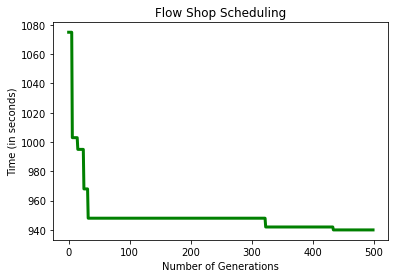

In [ ]:
get_plot(s)